<a href="https://colab.research.google.com/github/luigigenovese/BigDFT-nb/blob/master/ConnectivityMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pybigdft biopython ase dna-features-viewer pyfutile py3dmol condacolab

In [6]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


In [ ]:
!conda install pdbfixer

In [10]:
from BigDFT.Interop import OpenMMInterop as OI
sys=OI.fixed_system(pdbid='5bxq',pH=7.0)

/usr/local/lib/python3.10/dist-packages/Bio/SeqIO/PdbIO.py:322: BiopythonParserWarning: 'HEADER' line not found; can't determine PDB ID.
  warnings.warn(


In [54]:
sequences={}
for iseq,seq in enumerate(sys.sequences_to_fragments):
  key=''.join([sys.fragment_letters[sys.fragment_names.index(f)] for f in seq])
  sequences.setdefault(key,[]).append(iseq)


In [55]:
reseq={}
to_skip=[]
for iseq,seq in enumerate(sequences):
  matched=False
  for iseq2,seq2 in enumerate(sequences):
    if iseq2 <= iseq:
      continue
    s = SequenceMatcher(None, seq,seq2)
    for match in s.get_matching_blocks():
      if match.size> len(seq)/2:
        matched=True
        key=seq[match.a:match.a+match.size]
        to_add=list(sequences[seq2])
        if not all([a in to_skip for a in to_add]):
          reseq.setdefault(key,list(sequences[seq])).extend(to_add)
          to_skip.extend(to_add)
  if not matched and iseq < len(sequences)-1:
    reseq[seq]=list(sequences[seq])
  to_skip.extend(list(sequences[seq]))

In [56]:

sequences

{'KPIWEQIGSSFIQHYYQLFDNDRTQLGAIYIDASCLTWEGQQFQGKAAIVEKLSSLPFQKIQHSITAQDHQPTPDSCIISMVVGQLKADEDPIMGFHQMFLLKNINDAWVCTNDMFRLALHNFG': [0,
  1],
 'QVQFKLVLVGDGGTGKTTFVKRHLTGEFEKKYVATLGVEVHPLVFHTNRGPIKFNVWDTAGQEKFGGLRDGYYIQAQCAIIMFDVTSRVTYKNVPNWHRDLVRVCENIPIVLCGNKVDIKDRKVKAKSIVFHRKKNLQYYDISAKSNYNFEKPFLWLARKLIGDPNLEFVAMPALAPPEVVMDPALAAQYEHDLEVA': [2],
 'PQVQFKLVLVGDGGTGKTTFVKRHLTGEFEKKYVATLGVEVHPLVFHTNRGPIKFNVWDTAGQEKFGGLRDGYYIQAQCAIIMFDVTSRVTYKNVPNWHRDLVRVCENIPIVLCGNKVDIKDRKVKAKSIVFHRKKNLQYYDISAKSNYNFEKPFLWLARKLIGDPNLEFVAMPALAPPEVVMDPALAAQYEHDLEVAQTTA': [3],
 'QVQFKLVLVGDGGTGKTTFVKRHLTGEFEKKYVATLGVEVHPLVFHTNRGPIKFNVWDTAGQEKFGGLRDGYYIQAQCAIIMFDVTSRVTYKNVPNWHRDLVRVCENIPIVLCGNKVDIKDRKVKAKSIVFHRKKNLQYYDISAKSNYNFEKPFLWLARKLIGDPNLEFVAMPALAPPEVVMDPALAAQYEHDLEVAQTTALPDE': [4]}

In [57]:

reseq

{'KPIWEQIGSSFIQHYYQLFDNDRTQLGAIYIDASCLTWEGQQFQGKAAIVEKLSSLPFQKIQHSITAQDHQPTPDSCIISMVVGQLKADEDPIMGFHQMFLLKNINDAWVCTNDMFRLALHNFG': [0,
  1],
 'QVQFKLVLVGDGGTGKTTFVKRHLTGEFEKKYVATLGVEVHPLVFHTNRGPIKFNVWDTAGQEKFGGLRDGYYIQAQCAIIMFDVTSRVTYKNVPNWHRDLVRVCENIPIVLCGNKVDIKDRKVKAKSIVFHRKKNLQYYDISAKSNYNFEKPFLWLARKLIGDPNLEFVAMPALAPPEVVMDPALAAQYEHDLEVA': [2,
  3,
  4]}

In [22]:

from difflib import SequenceMatcher

string1=list(sequences.keys())[0]
string2=list(sequences.keys())[1]
match = SequenceMatcher(None, string1, string2).find_longest_match(
    0, len(string1), 0, len(string2))

In [23]:
match

Match(a=0, b=151, size=2)

In [12]:
sequences

{'KPIWEQIGSSFIQHYYQLFDNDRTQLGAIYIDASCLTWEGQQFQGKAAIVEKLSSLPFQKIQHSITAQDHQPTPDSCIISMVVGQLKADEDPIMGFHQMFLLKNINDAWVCTNDMFRLALHNFG': [0,
  1],
 'QVQFKLVLVGDGGTGKTTFVKRHLTGEFEKKYVATLGVEVHPLVFHTNRGPIKFNVWDTAGQEKFGGLRDGYYIQAQCAIIMFDVTSRVTYKNVPNWHRDLVRVCENIPIVLCGNKVDIKDRKVKAKSIVFHRKKNLQYYDISAKSNYNFEKPFLWLARKLIGDPNLEFVAMPALAPPEVVMDPALAAQYEHDLEVA': [2],
 'PQVQFKLVLVGDGGTGKTTFVKRHLTGEFEKKYVATLGVEVHPLVFHTNRGPIKFNVWDTAGQEKFGGLRDGYYIQAQCAIIMFDVTSRVTYKNVPNWHRDLVRVCENIPIVLCGNKVDIKDRKVKAKSIVFHRKKNLQYYDISAKSNYNFEKPFLWLARKLIGDPNLEFVAMPALAPPEVVMDPALAAQYEHDLEVAQTTA': [3],
 'QVQFKLVLVGDGGTGKTTFVKRHLTGEFEKKYVATLGVEVHPLVFHTNRGPIKFNVWDTAGQEKFGGLRDGYYIQAQCAIIMFDVTSRVTYKNVPNWHRDLVRVCENIPIVLCGNKVDIKDRKVKAKSIVFHRKKNLQYYDISAKSNYNFEKPFLWLARKLIGDPNLEFVAMPALAPPEVVMDPALAAQYEHDLEVAQTTALPDE': [4]}

In [ ]:
def correct_data(structure):
  from ase.units import Hartree,kcal,mol
  factor=Hartree/(kcal/mol)
  dispersion = structure.fragment_values('dispersion_interactions')
  total = structure.fragment_values('total_interactions') - dispersion
  dispersion /= factor
  total += dispersion
  structure.set_fragment_quantities('total_interactions',total)
  structure.set_fragment_quantities('dispersion_interactions',dispersion)

In [ ]:
from BigDFT import BioQM
structure = BioQM.load('1kac-1.2.tar.bz2',serialization_version='1.2')
correct_data(structure)

/usr/local/lib/python3.10/dist-packages/Bio/__init__.py:138: BiopythonWarning: You may be importing Biopython from inside the source tree. This is bad practice and might lead to downstream issues. In particular, you might encounter ImportErrors due to missing compiled C extensions. We recommend that you try running your code from outside the source tree. If you are outside the source tree then you have a setup.py file in an unexpected directory: /usr/local/lib/python3.10/dist-packages
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/SeqIO/PdbIO.py:322: BiopythonParserWarning: 'HEADER' line not found; can't determine PDB ID.
  warnings.warn(


In [ ]:
sys=structure
chainA=[sys.fragment_names.index(frag) for frag in sys.sequences_to_fragments[0]]
chainB=[sys.fragment_names.index(frag) for frag in sys.sequences_to_fragments[1]]

In [ ]:
cutoff=0.001
connectivity_matrix = BioQM.graph_bond(structure.fragment_names, cutoff, structure.bond_orders)

In [ ]:
import pandas as pd
df=pd.DataFrame(structure.bond_orders)
df=0.5*(df + df.T)

<ipython-input-34-940294c5ecba>:2: RuntimeWarning: divide by zero encountered in log
  ax.imshow(np.log(df[sys.sequences_to_fragments[0]].T[sys.sequences_to_fragments[1]].to_numpy()))
<ipython-input-34-940294c5ecba>:2: RuntimeWarning: invalid value encountered in log
  ax.imshow(np.log(df[sys.sequences_to_fragments[0]].T[sys.sequences_to_fragments[1]].to_numpy()))


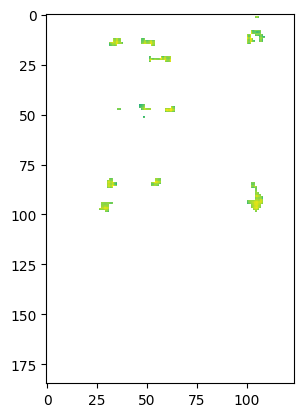

In [ ]:
fig,ax = subplots()
ax.imshow(np.log(df[sys.sequences_to_fragments[0]].T[sys.sequences_to_fragments[1]].to_numpy()))

In [ ]:
import numpy as np
mat=np.array([[structure.bond_orders[f][g] for f in structure.fragment_names] for g in structure.fragment_names])
mat += mat.T
mat *= 0.5*mat

In [ ]:
cm=connectivity_matrix[chainA].T[chainB].T

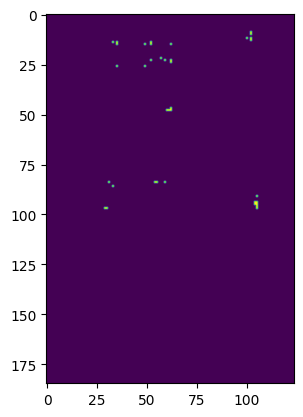

In [ ]:
from matplotlib.pyplot import subplots
fig,ax = subplots()
ax.imshow(cm)

In [ ]:
def display_structure(sys):
  cd = sys.colordict()
  from BigDFT.Interop import DNAviewerInterop as D
  return D.display_records(D.sys_into_records(structure,features={
      'Tot':'total_interactions',
      'El':'electrostatic_interactions',
      'H':'contact_interactions',
      'vdW':'dispersion_interactions'
      },field_vals={'Tot':'total_interactions'}))

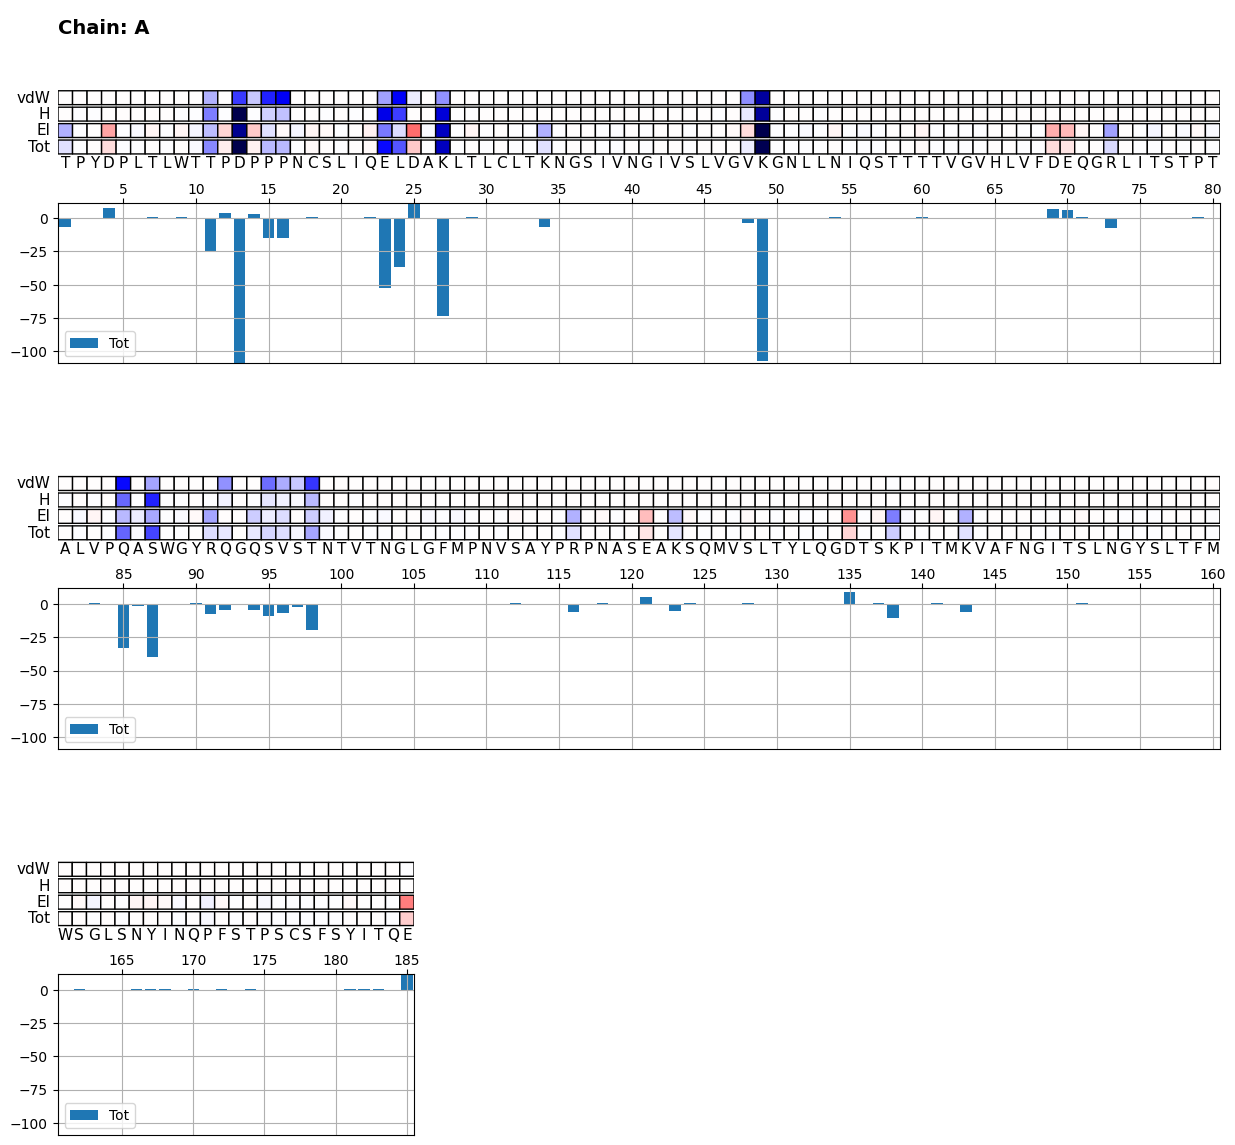

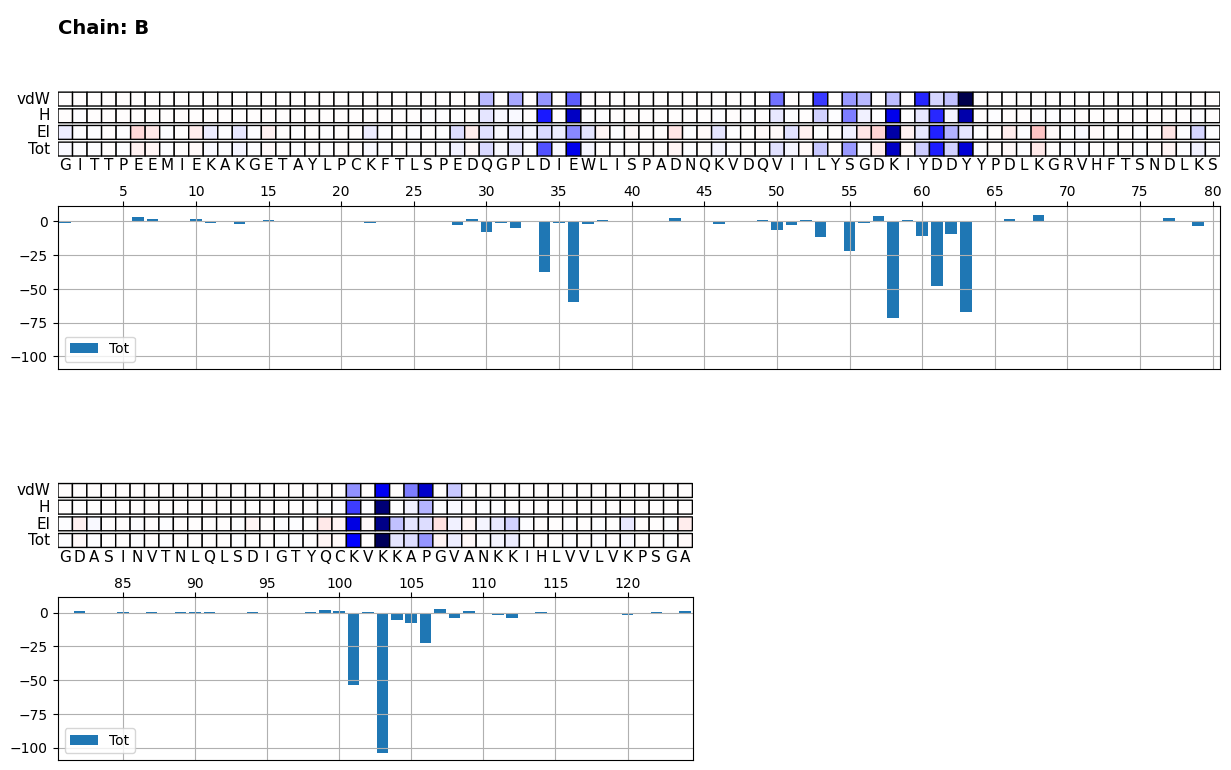

In [ ]:
_=display_structure(structure)

In [ ]:
interaction = 0.5 * sum(structure.fragment_values('total_interactions'))

In [ ]:
interaction

-547.1592553805648